<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/log_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [2]:
!pip install seaborn

In [3]:
!pip install -U tensorflow scikeras imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 71.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is inc

In [4]:
!pip install scikeras

In [5]:
!pip install -U scikit-learn scikeras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.losses import CategoricalCrossentropy

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings("ignore")


In [7]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [8]:
TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH, header=None)
test  = pd.read_csv(TEST_PATH, header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [9]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]


In [10]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [11]:
y_res_cat  = to_categorical(y_res, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res_cat, test_size=0.2, random_state=0
)


In [13]:
# Logistic Loss for multi-class classification
loss_fn = CategoricalCrossentropy()


In [14]:
def ann_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(64, activation="relu"),
        Dense(5, activation="softmax")
    ])

    model.compile(
        optimizer="adam",
        loss=loss_fn,
        metrics=["accuracy"]
    )

    return model


In [15]:
model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.8418 - loss: 0.4307 - val_accuracy: 0.9420 - val_loss: 0.1684
Epoch 2/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9507 - loss: 0.1426 - val_accuracy: 0.9616 - val_loss: 0.1099
Epoch 3/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9673 - loss: 0.0971 - val_accuracy: 0.9736 - val_loss: 0.0765
Epoch 4/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9744 - loss: 0.0747 - val_accuracy: 0.9721 - val_loss: 0.0815
Epoch 5/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9794 - loss: 0.0615 - val_accuracy: 0.9831 - val_loss: 0.0522
Epoch 6/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9826 - loss: 0.0528 - val_accuracy: 0.9820 - val_loss: 0.0583
Epoch 7/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9845 - loss: 0.0469 - val_accuracy: 0.9849 - val_loss: 0.0478
Epoch 8/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9861 - loss: 0

In [16]:
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)

mcc = matthews_corrcoef(y_val_true, y_val_pred)
print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Validation MCC: 0.9837314393134259


In [17]:
test_predictions = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test_cat)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9634 - loss: 0.1200
Test Accuracy: 0.9582952857017517
Test Loss: 0.17219538986682892


In [18]:
print(
    classification_report(
        np.argmax(y_test_cat, axis=1),
        np.argmax(test_predictions, axis=1)
    )
)


              precision    recall  f1-score   support

           0       0.99      0.96      0.98     18118
           1       0.58      0.81      0.68       556
           2       0.90      0.93      0.92      1448
           3       0.39      0.87      0.54       162
           4       0.96      0.98      0.97      1608

    accuracy                           0.96     21892
   macro avg       0.77      0.91      0.82     21892
weighted avg       0.97      0.96      0.96     21892



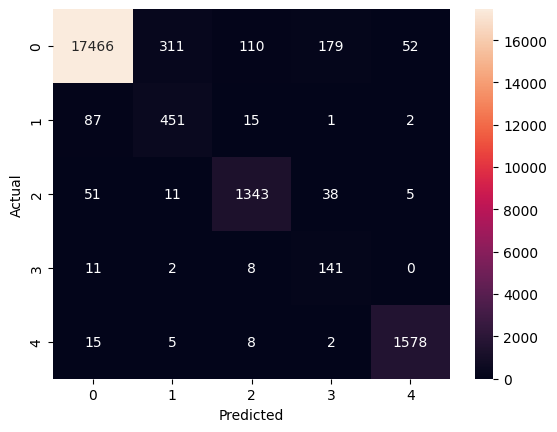

In [19]:
cm = confusion_matrix(
    np.argmax(y_test_cat, axis=1),
    np.argmax(test_predictions, axis=1)
)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
estimator = KerasClassifier(
    model=ann_model,
    epochs=10,
    batch_size=64,
    verbose=0
)

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

results = cross_val_score(
    estimator,
    X_res,
    y_res_cat,
    cv=kfold,
    scoring="accuracy"
)

print("Cross-validation scores:", results)
print("Mean CV accuracy:", results.mean())


Cross-validation scores: [0.98632284 0.98556116 0.98764751 0.98804477]
Mean CV accuracy: 0.9868940711476397
